# ACTIVIDAD DATAFRAMES CON PANDAS
Análisis de datos (grupo 2) \\
Unidad 10, Dataframes con pandas \\
Camilo Andrés Barajas Rozo \\
Cédula: 1000330011

**Objetivo:**  Afianzar el conocimiento obtenido en el uso de pandas.

**Descripción de la actividad**
1.  Cargue el dataset disponible en https://www.datos.gov.co/Econom-a-y-Finanzas/Tasa-de-Cambio-Representativa-del-Mercado-TRM/32sa-8pi3 .



In [53]:
!pip install sodapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sodapy import Socrata
client = Socrata('www.datos.gov.co', None)
results = client.get('32sa-8pi3')
datos = pd.DataFrame.from_records(results)
datos.head() # Se imprimen las primeras cinco filas del dataset.

,valor,unidad,vigenciadesde,vigenciahasta
0,4761.64,COP,2022-12-22T00:00:00.000,2022-12-22T00:00:00.000
1,4781.28,COP,2022-12-20T00:00:00.000,2022-12-20T00:00:00.000
2,4802.48,COP,2022-12-17T00:00:00.000,2022-12-19T00:00:00.000
3,4836.24,COP,2022-12-13T00:00:00.000,2022-12-13T00:00:00.000
4,4815.99,COP,2022-12-10T00:00:00.000,2022-12-12T00:00:00.000


2.  Calcular \\
    a. Media \\
    b. Mediana \\
    c. Desviación estándar \\
    d. Máximo \\
    e. Mínimo \\
    f. Máximo \\
    g. Rango \\

In [55]:
# Se realiza la limpieza y las transformaciones necesarias al dataset.
datos_arreglada=datos.dropna(axis=0, how='any') # Se borran los valores nulos.
datos_arreglada['valor'] = datos_arreglada['valor'].astype(float) # Se convierte el tipo de los datos de la columna 'valor' del dataframe a tipo real.
datos_arreglada['vigenciadesde'] = pd.to_datetime(datos_arreglada['vigenciadesde']) # Se convierte el tipo de los datos de la columna 'vigenciadesde' del dataframe a objeto de fecha y hora.
datos_arreglada['vigenciahasta'] = pd.to_datetime(datos_arreglada['vigenciahasta']) # Se convierte el tipo de los datos de la columna 'vigenciahasta' del dataframe a objeto de fecha y hora.

# Se calcula lo propuesto anteriormente para presentar una descripción de los datos de la columna 'valor' del dataframe.
print('Valores descriptivos de la columna valor del dataframe:')
dic={'Media': datos_arreglada.valor.mean(),
     'Mediana':datos_arreglada.valor.median(),
     'Desviación estándar':datos_arreglada.valor.std(),
     'Máximo': datos_arreglada.valor.max(),
     'Mínimo':datos_arreglada.valor.min(),
     'Rango': datos_arreglada.valor.max()-datos_arreglada.valor.min()} # Se crea un diccionario con los valores descriptivos del dataframe.

serie=pd.Series(dic) # Se crea una serie a partir del diccionario anterior.
print(round(serie, 2)) # Se imprime la serie redondeando los valores a dos decimales.

Valores descriptivos de la columna valor del dataframe:
Media                  3042.38
Mediana                2972.52
Desviación estándar     730.69
Máximo                 5061.21
Mínimo                 1846.12
Rango                  3215.09
dtype: float64


3. Presentar el resumen de los datos numéricos

In [56]:
print('-------------------------------------------------------------------------')
print('Resumen del dataset tal cual como se cargó de datos.gov. \n', datos.describe())
print('-------------------------------------------------------------------------')
print('Resumen del dataset una vez realizada la limpieza y transformación de los datos. \n',datos_arreglada.describe())
print('-------------------------------------------------------------------------')

-------------------------------------------------------------------------
Resumen del dataset tal cual como se cargó de datos.gov. 
           valor unidad            vigenciadesde            vigenciahasta
count      1000   1000                     1000                     1000
unique      998      1                     1000                     1000
top     2930.17    COP  2022-12-22T00:00:00.000  2022-12-22T00:00:00.000
freq          2   1000                        1                        1
-------------------------------------------------------------------------
Resumen del dataset una vez realizada la limpieza y transformación de los datos. 
              valor
count  1000.000000
mean   3042.376510
std     730.689006
min    1846.120000
25%    2500.497500
50%    2972.525000
75%    3646.340000
max    5061.210000
-------------------------------------------------------------------------



**Respuesta al análisis.**

  Al analizar el dataset cargado originalmente, se observa que el tipo de las columnas de los datos no es el que corresponde, dado que, la columna "valor" se identifica como un tipo de dato "object" en lugar de un tipo real. Así como el tipo de los datos de las columnas "vigenciadesde" y "vigenciahasta" del dataset también se identifica como un tipo de dato "object" en lugar de objeto de fecha y hora.

  Para abordar esta discrepancia, se realizó una operación de conversión de los valores de las columnas al tipo de dato correcto, creando un nuevo dataframe llamado "datos_arreglada". Esta conversión permitió presentar de manera correcta el resumen de los datos numéricos del dataset.

4. Presentar la información general del dataset

In [57]:
print('-------------------------------------------------------------------------')
print('Información general del dataset tal cual como se cargó de datos.gov. \n',datos.info())
print('-------------------------------------------------------------------------')
print('Información general del dataset una vez realizada la limpieza y transformación de los datos. \n',datos_arreglada.info())
print('-------------------------------------------------------------------------')

-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          1000 non-null   object
 1   unidad         1000 non-null   object
 2   vigenciadesde  1000 non-null   object
 3   vigenciahasta  1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB
Información general del dataset tal cual como se cargó de datos.gov. 
 None
-------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   valor          1000 non-null   float64       
 1   unidad         1000 non-null   object        
 2   vigenciadesde  1000 non-null   datetime64[ns]
 3   vigenci

**Respuesta al análisis.**

  Al analizar el dataset cargado originalmente, se observa que el tipo de las columnas de los datos no es el que corresponde, dado que, la columna "valor" se identifica como un tipo de dato "object" en lugar de un tipo real. Así como el tipo de los datos de las columnas "vigenciadesde" y "vigenciahasta" del dataset también se identifica como un tipo de dato "object" en lugar de objeto de fecha y hora.

  Para abordar esta discrepancia, se realizó una operación de conversión de los valores de las columnas al tipo de dato correcto, creando un nuevo dataframe llamado "datos_arreglada". Esta conversión permitió presentar la información general del dataset de manera correcta.

5. Hacer dos representaciones graficas que sean acordes a la naturaleza de los datos

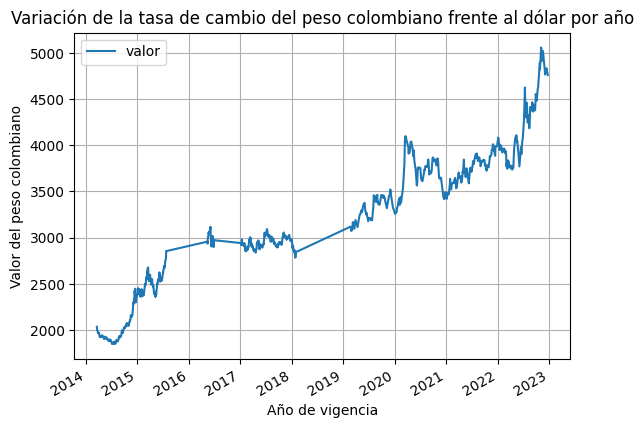

In [58]:
# Diagrama de línea, valor numérico, tasa de cambio del peso colombiano frente al dólar por año.
datos_arreglada.plot('vigenciadesde','valor')
plt.title('Variación de la tasa de cambio del peso colombiano frente al dólar por año')
plt.xlabel('Año de vigencia')
plt.ylabel('Valor del peso colombiano')
plt.grid()
plt.show()

**Respuesta al análisis.** \\
Este diagrama de línea nos muestra, el cambio del valor numérico de la tasa, de cambio del peso colombiano frente al dólar por año, además de este podemos extraer: \\
Una tendencia al alza del precio del dólar respecto al peso colombiano; debido al aumento sostenido del precio del dólar desde el año 2014 hasta finales del 2022, lo indica cuál indica que, en general, el peso colombiano se ha depreciado frente al dólar en este período. Esta tendencia puede estar influenciada por diversos factores económicos, políticos o comerciales;
y recientemente causados por la recesión mundial y la pandemia del covid-19 a partir del año 2020 hasta la actualidad, en dónde se ve mayor variación en la tasa de cambio, principalmente al alza. \\
Esta alza, la cual sobrepaso el umbral de los $5000 peso a finales del año 2022, ha tenido implicaciones económicas para diferentes sectores y actores en Colombia. Por ejemplo, las importaciones se están volviendo más costosas, lo que puede afectar el poder adquisitivo y la competitividad de las empresas locales. Por otro lado, las exportaciones pueden beneficiarse de una tasa de cambio más favorable, lo que puede estimular la actividad exportadora.

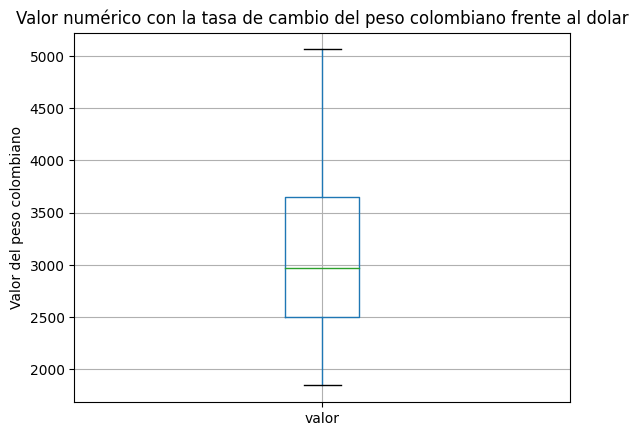

In [59]:
# Diagrama de cajas y bigotes; valor numérico, tasa de cambio del peso colombiano frente al dólar.
datos_arreglada.boxplot()
plt.title('Valor numérico con la tasa de cambio del peso colombiano frente al dolar')
plt.ylabel('Valor del peso colombiano')
plt.show()

**Respuesta al análisis.** \\
Este diagrama de cajas y bigotes nos muestra, la distribución del conjunto de datos correspondientes al valor numérico de la tasa de cambio del peso colombiano frente al dólar, entre los años 2014 al 2023. Proporcionando información sobre la mediana, los cuartiles y los valores atípicos de los datos. \\
Respecto al análisis de este diagrama podemos inferir que: \\
La tasa de cambio del peso colombiano frente al dólar tiene una distribución con una mediana de, 2972.525 pesos. Esto significa que el 50% de las observaciones de la tasa de cambio se encuentran por encima de este valor y el otro 50% se encuentran por debajo de este valor. \\
Una variabilidad que se extiende desde 2500.498 pesos correspondientes al 25% hasta, 3646.340 pesos correspondientes al 75%. Sin valores atípicos presentes, podemos decir que la distribución de la tasa de cambio es relativamente estable, lo cual es muy bueno, y significa que es una moneda estable en la cual los inversionistas pueden confiar para futuras inversiones en el país.

6. Usando Socrata, Cargue un dataset que se encuentre en el portal de datos públicos de Colombia

In [60]:
# Se usa un dataset sobre casos positivos de COVID-19 en Colombia.
client = Socrata('www.datos.gov.co', None)
results = client.get('gt2j-8ykr')
datosCovid = pd.DataFrame.from_records(results)
datosCovid.head() # Se imprimen las primeras cinco filas del dataset.

,fecha_reporte_web,id_de_caso,fecha_de_notificaci_n,departamento,departamento_nom,ciudad_municipio,ciudad_municipio_nom,edad,unidad_medida,sexo,...,ubicacion,estado,recuperado,fecha_inicio_sintomas,fecha_diagnostico,fecha_recuperado,tipo_recuperacion,per_etn_,nom_grupo_,fecha_muerte
0,2021-03-04 00:00:00,2265685,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,Casa,Leve,Recuperado,2021-02-25 00:00:00,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN,NaN
1,2021-03-04 00:00:00,2265686,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,49,1,M,...,Casa,Leve,Recuperado,2021-02-23 00:00:00,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN,NaN
2,2021-03-04 00:00:00,2265687,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,Casa,Leve,Recuperado,2021-02-24 00:00:00,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN,NaN
3,2021-03-04 00:00:00,2265688,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,Casa,Leve,Recuperado,2021-02-27 00:00:00,2021-03-03 00:00:00,2021-03-13 00:00:00,Tiempo,6,NaN,NaN
4,2021-03-04 00:00:00,2265689,2021-03-02 00:00:00,11,BOGOTA,11001,BOGOTA,51,1,F,...,Casa,Leve,Recuperado,2021-03-01 00:00:00,2021-03-03 00:00:00,2021-03-16 00:00:00,Tiempo,6,NaN,NaN


7. Realice las tareas de limpieza y transformación necesarias

In [61]:
datosCovid.info() # Información general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   fecha_reporte_web      1000 non-null   object
 1   id_de_caso             1000 non-null   object
 2   fecha_de_notificaci_n  1000 non-null   object
 3   departamento           1000 non-null   object
 4   departamento_nom       1000 non-null   object
 5   ciudad_municipio       1000 non-null   object
 6   ciudad_municipio_nom   1000 non-null   object
 7   edad                   1000 non-null   object
 8   unidad_medida          1000 non-null   object
 9   sexo                   1000 non-null   object
 10  fuente_tipo_contagio   1000 non-null   object
 11  ubicacion              1000 non-null   object
 12  estado                 1000 non-null   object
 13  recuperado             1000 non-null   object
 14  fecha_inicio_sintomas  1000 non-null   object
 15  fecha_diagnostico     

In [62]:
# Se realiza la limpieza y las transformaciones necesarias al dataset.
datosCovid_arreglada=datosCovid.fillna(value=0) # Se reemplaza los valores nulos por el valor cero.
datosCovid_arreglada['fecha_reporte_web'] = pd.to_datetime(datosCovid_arreglada['fecha_reporte_web']) # Se convierte el tipo de los datos de la columna 'fecha_reporte_web' del dataframe a objeto de fecha y hora.
datosCovid_arreglada['id_de_caso'] = datosCovid_arreglada['id_de_caso'].astype(float) # Se convierte el tipo de los datos de la columna 'id_de_caso' del dataframe a tipo real.
datosCovid_arreglada['fecha_de_notificaci_n'] = pd.to_datetime(datosCovid_arreglada['fecha_de_notificaci_n']) # Se convierte el tipo de los datos de la columna 'fecha_de_notificaci_n' del dataframe a objeto de fecha y hora.
datosCovid_arreglada['departamento'] = datosCovid_arreglada['departamento'].astype(int) # Se convierte el tipo de los datos de la columna 'departamento' del dataframe a tipo entero.
datosCovid_arreglada['ciudad_municipio'] = datosCovid_arreglada['ciudad_municipio'].astype(int) # Se convierte el tipo de los datos de la columna 'ciudad_municipio' del dataframe a tipo entero.
datosCovid_arreglada['edad'] = datosCovid_arreglada['edad'].astype(int) # Se convierte el tipo de los datos de la columna 'edad' del dataframe a tipo entero.
datosCovid_arreglada['unidad_medida'] = datosCovid_arreglada['unidad_medida'].astype(int) # Se convierte el tipo de los datos de la columna 'unidad_medida' del dataframe a tipo entero.
datosCovid_arreglada['fecha_inicio_sintomas'] = pd.to_datetime(datosCovid_arreglada['fecha_inicio_sintomas']) # Se convierte el tipo de los datos de la columna 'fecha_inicio_sintomas' del dataframe a objeto de fecha y hora.
datosCovid_arreglada['fecha_diagnostico'] = pd.to_datetime(datosCovid_arreglada['fecha_diagnostico']) # Se convierte el tipo de los datos de la columna 'fecha_diagnostico' del dataframe a objeto de fecha y hora.
datosCovid_arreglada['fecha_recuperado'] = pd.to_datetime(datosCovid_arreglada['fecha_recuperado']) # Se convierte el tipo de los datos de la columna 'fecha_recuperado' del dataframe a objeto de fecha y hora.
datosCovid_arreglada['per_etn_'] = datosCovid_arreglada['per_etn_'].astype(int) # Se convierte el tipo de los datos de la columna 'per_etn_' del dataframe a tipo entero.
datosCovid_arreglada['fecha_muerte'] = pd.to_datetime(datosCovid_arreglada['fecha_muerte']) # Se convierte el tipo de los datos de la columna 'fecha_muerte' del dataframe a objeto de fecha y hora.

datosCovid_arreglada.info() # Información general del dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   fecha_reporte_web      1000 non-null   datetime64[ns]
 1   id_de_caso             1000 non-null   float64       
 2   fecha_de_notificaci_n  1000 non-null   datetime64[ns]
 3   departamento           1000 non-null   int64         
 4   departamento_nom       1000 non-null   object        
 5   ciudad_municipio       1000 non-null   int64         
 6   ciudad_municipio_nom   1000 non-null   object        
 7   edad                   1000 non-null   int64         
 8   unidad_medida          1000 non-null   int64         
 9   sexo                   1000 non-null   object        
 10  fuente_tipo_contagio   1000 non-null   object        
 11  ubicacion              1000 non-null   object        
 12  estado                 1000 non-null   object        
 13  recu

8. Presentar el dataset, mostrando datos estadísticos y gráficas

In [63]:
print('Resumen del dataset una vez realizada la limpieza y transformación de los datos.')
datosCovid_arreglada.describe() # Resumen del dataset.

Resumen del dataset una vez realizada la limpieza y transformación de los datos.


,id_de_caso,departamento,ciudad_municipio,edad,unidad_medida,per_etn_
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.166259e+06,5238.717000,28637.881000,37.800000,1.003000,5.912000
std,4.352711e+05,9714.475467,26460.044424,18.907181,0.054717,0.616958
min,6.759180e+05,5.000000,5001.000000,1.000000,1.000000,1.000000
25%,2.096634e+06,25.000000,8001.000000,25.000000,1.000000,6.000000
50%,2.361872e+06,76.000000,14418.500000,33.000000,1.000000,6.000000
75%,2.389048e+06,8001.000000,50001.000000,51.000000,1.000000,6.000000
max,2.435324e+06,47001.000000,99001.000000,99.000000,2.000000,6.000000


In [64]:
# Se calculan datos estadísticos relevantes del dataset sobre casos positivos de COVID-19 en Colombia para presentar una descripción de los datos.
print('Valores descriptivos de la columna "edad" del dataframe:')
dicCovid={'Media': datosCovid_arreglada.edad.mean(),
     'Mediana':datosCovid_arreglada.edad.median(),
     'Desviación estándar':datosCovid_arreglada.edad.std(),
     'Máximo': datosCovid_arreglada.edad.max(),
     'Mínimo':datosCovid_arreglada.edad.min(),
     'Cuartil 3 (75%)': datosCovid_arreglada.edad.quantile(0.75)} # Se crea un diccionario con los valores descriptivos del dataframe.

serieCovid=pd.Series(dicCovid) # Se crea una serie a partir del diccionario anterior.
print(serieCovid.astype(int)) # Se imprime la serie con valores enteros.

Valores descriptivos de la columna "edad" del dataframe:
Media                  37
Mediana                33
Desviación estándar    18
Máximo                 99
Mínimo                  1
Cuartil 3 (75%)        51
dtype: int64


**Respuesta al análisis.**

Basándonos en los datos estadísticos proporcionados del dataset de casos positivos de COVID-19 en Colombia, en particular, los datos relacionados con las edades, se pueden extraer las siguientes conclusiones e interpretaciones:

*   La media de las edades de los casos positivos de COVID-19 en Colombia es de 37 años. Esto indica qué las personas contagiadas de COVID-19 en Colombia tienen una media de edad relativamente joven pertenecientes a edad laboral, con pocas personas del grupo poblacional de adultos mayores.

*   La desviación estándar de 18 años indica la dispersión de las edades de los casos positivos de COVID-19 con respecto a la media.

*   La mediana de las edades de los casos positivos de COVID-19 es de 33 años. Esta representa el valor central de las edades cuando se ordenan de menor a mayor. En este caso, el 50% de los casos tienen una edad menor o igual a 33 años, y el otro 50% tiene una edad mayor o igual a 33 años. Además, esta proporciona una medida de tendencia central que no se ve afectada por valores extremos o atípicos como personas muy jóvenes o adultos mayores que sobrepasan los 80 años.

*   El valor máximo de 99 indica que la edad más alta registrada en los casos positivos de COVID-19 es de 99 años. El valor mínimo de 1 indica que la edad más baja registrada es de 1 año. Estos valores proporcionan información sobre el rango de edades de las personas contagiadas de COVID-19 en Colombia.

*   El cuartil 3 (Q3) perteneciente a 51 años indica que el 75% de los casos positivos de COVID-19 tienen una edad menor o igual a 51 años. Esto indica que hay un 25% de los casos con edades superiores a este valor y que además se catalogan como población de riesgo al ser mayores de 51 años y que, por lo tanto, son más propensos a sufrir fuertes síntomas por el contagio o incluso el fallecimiento.

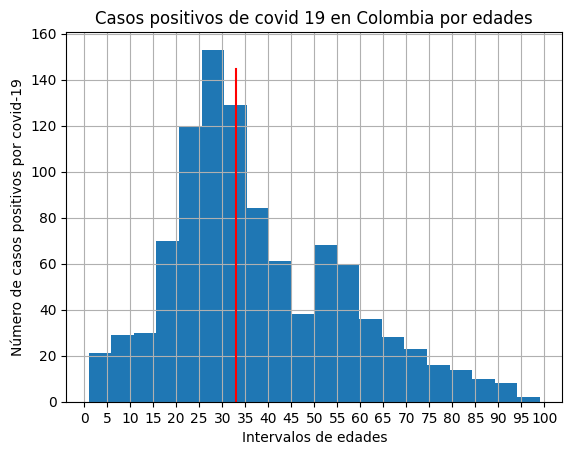

In [65]:
# Histograma casos positivos de COVID-19 en Colombia por edades.
datosCovid_arreglada.edad.hist(bins=20)
plt.xticks(range(0,105,5))
plt.title('Casos positivos de covid 19 en Colombia por edades')
plt.axvline(datosCovid_arreglada.edad.median(), ymin=0.0, ymax=0.9,color='r')
plt.ylabel('Número de casos positivos por covid-19')
plt.xlabel('Intervalos de edades')
plt.show()

**Respuesta al análisis.**

Este histograma nos muestra, la distribución de una variable en intervalos o rangos específicos. En este caso, un histograma de los casos positivos de COVID-19 en Colombia por edades. El eje horizontal se representa los intervalos de edades, mientras que el eje vertical muestra la frecuencia o el número de casos en cada intervalo y la línea roja muestra la mediana que divide la población en la mitad o el 50%.

Respecto al análisis de este histograma podemos inferir que:

Se identifica que el intervalo de edades con la mayor frecuencia (moda) es aproximadamente entre 26 a 31 con y la mediana de 33 años que nos indica que la distribución de las edades tiende a estar ligeramente sesgada hacia la derecha o hacia edades más bajas menores a 50 años. De lo anterior podemos decir que en este intervalo (de 1 a 50 años) se encuentra la mayoría de la población de casos positivos de COVID-19 en Colombia.

También se evidencia que las edades de los casos están dispersos en un rango amplio de edades, lo que muestra que los casos positivos de COVID-19 afectan a personas de diferentes grupos de edad, desde niños pequeños hasta personas mayores.



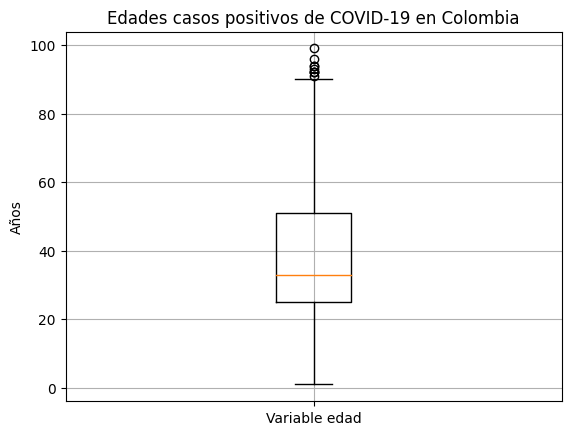

In [66]:
# Diagrama de cajas y bigotes; edades casos positivos de COVID-19 en Colombia.
plt.boxplot(datosCovid_arreglada['edad'])
plt.title('Edades casos positivos de COVID-19 en Colombia')
plt.ylabel('Años')
plt.xticks([1], ['Variable edad'])
plt.grid()
plt.show()

**Respuesta al análisis.**

Este diagrama de cajas y bigotes nos muestra, la distribución del conjunto de datos correspondientes a las edades de casos positivos de COVID-19 en Colombia. Proporcionando información sobre la mediana, los cuartiles y los valores atípicos de los datos.

Respecto al análisis de este diagrama podemos inferir que:

En cuanto a la caja (rango inter cuartil) muestra que el 50% central de los casos se encuentra entre Q1 (alrededor de 25 años) y Q3 (51 años). Esto indica como ya sé mencionó que la mayoría de los casos se concentran en este rango de edades.

Además, también se logró observar que se poseen varios datos atípicos qué se encuentran más allá de los bigotes, se representan como puntos individuales o asteriscos en el gráfico. Los cuales indican observaciones excepcionales o inusuales en términos de edad. De modo que se puede estimar qué las edades superiores a 90 años son valores atípicos en los casos positivos por COVID-19 en Colombia.


Recuperado    966
Fallecido      27
Name: recuperado, dtype: int64


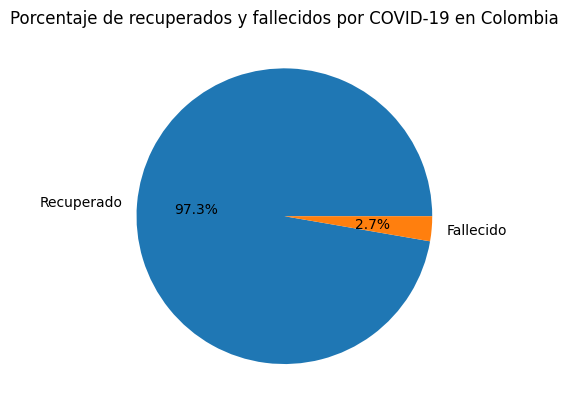

In [67]:
# Se cuenta los posibles valores que puede tomar la variable en la columna 'recuperado' del dataframe y se realiza la correspondiente limpieza de los datos.
FalleVSRecupe=datosCovid_arreglada["recuperado"].value_counts(ascending=False)
del(FalleVSRecupe['N/A'])
print(FalleVSRecupe)

# Diagrama circular o de sectores porcentaje de recuperados y fallecidos por COVID-19 en Colombia.
plt.pie(FalleVSRecupe, labels=FalleVSRecupe.index, autopct='%1.1f%%')
plt.title('Porcentaje de recuperados y fallecidos por COVID-19 en Colombia')
plt.show()

**Respuesta al análisis.**

Este circular o de sectores nos muestra, la proporción o porcentaje de diferentes categorías en un conjunto de datos. En este caso, sobre el porcentaje de recuperados y fallecidos por COVID-19 en Colombia.

Respecto al análisis de este diagrama podemos inferir que:

*   Recuperado: El sector correspondiente a "Recuperado" representa el 97.3% del diagrama. Esto indica que la mayoría de los casos de COVID-19 en Colombia han resultado en recuperación.

*   Fallecido: El sector correspondiente a "Fallecido" representa el 2.7% del diagrama. Esto indica que una proporción pequeña de los casos de COVID-19 en Colombia ha resultado en fallecimiento.

En conclusión, podemos decir que Colombia tuvo un buen manejo de la pandemia, según lo que muestra el diagrama, porque la mayoría de casos de covid-19 han logrado recuperarse.

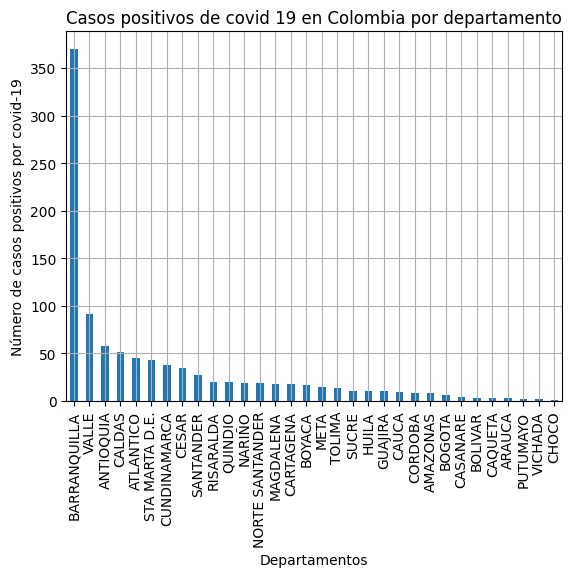

In [68]:
# Se cuenta los posibles valores que puede tomar la variable en la columna 'departamento_nom' del dataframe.
CantiMuni=datosCovid_arreglada["departamento_nom"].value_counts(ascending=False)

# Diagrama de barras, casos positivos de covid-19 en Colombia por departamento.
CantiMuni.plot(kind='bar')
plt.title('Casos positivos de covid 19 en Colombia por departamento')
plt.xlabel('Departamentos')
plt.ylabel('Número de casos positivos por covid-19')
plt.grid()
plt.show()

**Respuesta al análisis.**

Este diagrama de barras nos muestra la frecuencia o cantidad de diferentes categorías en un conjunto de datos. En este caso, los casos positivos de COVID-19 en los municipios de Colombia. En donde el eje horizontal representa los municipios, mientras que el eje vertical representa la cantidad de casos positivos de COVID-19 en cada municipio.

Respecto al análisis de este diagrama podemos inferir que:

Este permitió comparar visualmente la cantidad de casos positivos en diferentes municipios. Podemos observar que hay una variación considerable en la cantidad de casos entre los municipios, destacando algunos con números significativamente más altos que otros.

Como por ejemplo Barranquilla, que tiene la mayor cantidad de casos positivos con 370, lo cual es notablemente superior a los demás municipios y que demuestra la ineficiente labor del municipio para evitar los contagios.

Además de evidenciar que algunos municipios tienen un número considerablemente menor de casos, como Chocó con solo 1 caso, lo que demuestra que a pesar de la poca población del Chocó, existe una muy buena labor y un plan de contingencia para evitar los contagios.

-------------------------------
           Femenino  Masculino
Leve            517        448
Fallecido        13         14
-------------------------------


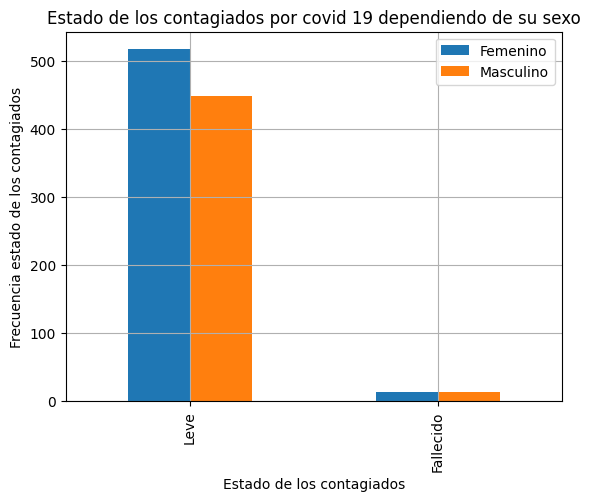

In [69]:
# Se realiza el filtrado del dataframe en la columna 'sexo' para separar los de género masculino y femenino.
FemeninoData=datosCovid_arreglada[datosCovid_arreglada['sexo']=='F']
MasculinoData=datosCovid_arreglada[datosCovid_arreglada['sexo']=='M']

# Se cuenta los posibles valores que puede tomar la variable en la columna 'estado' del dataframe filtrado pertenecientes a los de sexo femenino.
CantiEstadoF=FemeninoData["estado"].value_counts(ascending=False)
del(CantiEstadoF['N/A']) # Se realiza la correspondiente limpieza de los datos.

# Se cuenta los posibles valores que puede tomar la variable en la columna 'estado' del dataframe filtrado pertenecientes a los de sexo masculino.
CantiEstadoM=MasculinoData["estado"].value_counts(ascending=False)
del(CantiEstadoM['N/A']) # Se realiza la correspondiente limpieza de los datos.

# Se crea un diccionario con los valores descriptivos de la columna 'estado' para los dos diferentes sexos.
dicSexo={'Femenino':CantiEstadoF,
     'Masculino':CantiEstadoM }

dataFrameSexo=pd.DataFrame(dicSexo) # Se crea un data frame a partir del diccionario anterior.
print('-------------------------------')
print(dataFrameSexo) # Se imprime el data frame.
print('-------------------------------')

# Gráfica de barras agrupadas, estado de los contagiados por covid 19 dependiendo de su sexo (masculino o femenino).
dataFrameSexo.plot(kind='bar')
plt.title('Estado de los contagiados por covid 19 dependiendo de su sexo')
plt.xlabel('Estado de los contagiados')
plt.ylabel('Frecuencia estado de los contagiados')
plt.grid()
plt.show()

**Respuesta al análisis.**

Esta gráfica de barras agrupadas nos muestra la comparación de diferentes categorías en función de múltiples variables. En este caso, el estado leve o fallecido de los casos positivos de COVID-19 en Colombia por sexo. En donde el eje horizontal se representan las categorías (leve y fallecido), mientras que en el eje vertical se representa la cantidad de casos positivos de COVID-19 en cada categoría y sexo.

Respecto al análisis de este diagrama podemos inferir que:

Para la categoría "Leve", se observa que tanto en el grupo femenino como en el masculino hay una cantidad considerable de casos. Sin embargo, el grupo femenino tiene una mayor cantidad de casos leves con 517, en comparación con el grupo masculino que tiene 448.

En cuanto a la categoría "Fallecido", se puede observar que la cantidad de casos es mucho menor en ambos grupos. El grupo femenino registra 13 casos fallecidos, mientras que el grupo masculino registra 14 casos fallecidos.

Por lo tanto, podemos concluir qué las personas de sexo masculino han sido más afectados por el covid-19 en Colombia.

9. Se debe incluir mínimo una tabla pivote y una agrupación

In [70]:
# Se realiza la tabla pivote y se imprime.
datosCovid_arreglada.pivot_table(values='edad', index=['departamento_nom'], columns=['fuente_tipo_contagio'],aggfunc='count')

fuente_tipo_contagio,Comunitaria,Relacionado
departamento_nom,,
AMAZONAS,4.0,4.0
ANTIOQUIA,28.0,30.0
ARAUCA,NaN,3.0
ATLANTICO,26.0,19.0
BARRANQUILLA,194.0,176.0
BOGOTA,3.0,3.0
BOLIVAR,3.0,NaN
BOYACA,10.0,7.0
CALDAS,37.0,15.0


Esta tabla pivote muestra el tipo de fuente de contagio de COVID-19 en Colombia por departamento. Las columnas "fuente_tipo_contagio" representan las dos categorías de fuentes de contagio: "Comunitaria" y "Relacionado". Estas categorías indican cómo se adquirió el virus en cada departamento.

Los departamentos están listados en la columna "departamento_nom", y cada celda de la tabla indica la cantidad de casos reportados en esa combinación específica de departamento y tipo de fuente de contagio. La presencia de valores "NaN" indica que no se dispone de datos para esa combinación específica de departamento y tipo de fuente de contagio.

In [71]:
# Se realiza la tabla pivote y se imprime.
PivoteSexRecupe=datosCovid_arreglada.pivot_table(values='edad', index=['sexo'], columns=['recuperado'],aggfunc='mean')
del(PivoteSexRecupe['N/A']) # Se realiza la correspondiente limpieza de los datos.
PivoteSexRecupe

recuperado,Fallecido,Recuperado
sexo,,
F,69.538462,37.591876
M,68.785714,35.748330


Esta tabla pivote muestra el estado de las personas contagiadas con COVID-19, ya sea que se hayan recuperado o fallecido, según su sexo (femenino o masculino). Además, se proporciona el promedio de edad de las personas en cada categoría. Las columnas "Recuperado" y "Fallecido" representan los dos estados posibles de las personas contagiadas: recuperado o fallecido.

La columna "sexo" indica el género de las personas, donde "F" representa el sexo femenino y "M" representa el sexo masculino.

Dentro de cada celda indican el número promedio de edad de las personas en cada estado y sexo. Por ejemplo, en la celda correspondiente a "F" en la columna "recuperado", se observa un valor de 69.538462, lo que indica que, en promedio, las mujeres recuperadas tienen una edad de aproximadamente 69.5 años.

In [72]:
# Se realiza la tabla de agrupación se imprime.
AgrupadaRecupera=datosCovid_arreglada.groupby(datosCovid_arreglada['tipo_recuperacion']).count()[['departamento']]
AgrupadaRecupera=AgrupadaRecupera.rename(columns={'departamento':'Cantidad'}, index={0:'Fallecidos'}) # se realizan cambios en los nombres de las columnas y en índices.
AgrupadaRecupera

,Cantidad
tipo_recuperacion,
Fallecidos,34
PCR,210
Tiempo,756


Esta tabla de agrupación muestra el tipo de recuperación de las personas contagiadas con COVID-19 en Colombia y la cantidad correspondiente en cada categoría.

La columna "tipo_recuperacion" indica los diferentes tipos de recuperación que se han registrado para las personas contagiadas. En este caso, los tipos de recuperación son "Fallecidos", "PCR" y "Tiempo". La columna "Cantidad" indica la cantidad de personas que se han recuperado según cada tipo de recuperación mencionado.

In [73]:
# Se realiza la tabla de agrupación se imprime.
datosCovid_arreglada.groupby(datosCovid_arreglada['departamento_nom']).mean()[['edad']]

<ipython-input-73-a5cd60404feb>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datosCovid_arreglada.groupby(datosCovid_arreglada['departamento_nom']).mean()[['edad']]


,edad
departamento_nom,
AMAZONAS,53.750000
ANTIOQUIA,43.931034
ARAUCA,19.333333
ATLANTICO,38.444444
BARRANQUILLA,35.654054
BOGOTA,50.500000
BOLIVAR,52.333333
BOYACA,42.647059
CALDAS,36.807692


Esta tabla de agrupación muestra los departamentos de Colombia con casos positivos de COVID-19 y el promedio de edad de las personas contagiadas.

La columna "departamento_nom" indica los diferentes departamentos de Colombia que han registrado casos positivos de COVID-19. La columna "edad" muestra el promedio de edad de las personas contagiadas en cada departamento. Por ejemplo, en el departamento de Amazonas, el promedio de edad de las personas contagiadas es de 53.73 años, en Antioquia es de 43.93 años, en Arauca es de 19.33 años, y así sucesivamente para cada departamento.

10. Todas las gráficas deben ser explicadas

**Las gráficas fueron explicadas y analizadas con anterioridad en cada punto correspondiente.**